Загрузить датасет Ирисов (sklearn.datasets.load_iris). 
Вывести количество объектов в датасете. 
Вывести количество классов, их названия. 
Вывести количество признаков, их названия. 


In [306]:
from sklearn import datasets
a = datasets.load_iris()
print(len(a.data))

print(a.target_names)
print(len(a.target_names))

print(a.feature_names)

#print(a)


150
['setosa' 'versicolor' 'virginica']
3
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Разбить датасет на трейн и тест в отношении 70/30(удобно это делать функцией sklearn.model_selection.train_test_split). 


In [307]:
from sklearn.model_selection import train_test_split
X = a.data     #data
y = a.target   #class

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(len(X_train) / (len(X_train)+len(X_test)))

0.7


Вывести матрицы неточностей (confusion matrix) для каждого алгоритма, Рассчитать точность и полноту и f-меру по макро и микро усреднению (отдельная функция)

In [308]:
def debugg(result, y_test):
  print(result)
  print(y_test)
  print(confusion_matrix(y_test, result))
  print(precision_recall_fscore_support(y_test, result, average='macro'))
  print(precision_recall_fscore_support(y_test, result, average='micro'))

Обучить алгоритмы 3х ближайших соседей


In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
result = neigh.predict(X_test)
debugg(result, y_test)

[2 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 1 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 1 0 2
 0 2 1 0 0 0 1 0]
[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 2 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 2 0 2
 0 2 1 0 0 0 1 0]
[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
(0.9264957264957264, 0.9305555555555555, 0.927741935483871, None)
(0.9333333333333333, 0.9333333333333333, 0.9333333333333333, None)


логистической регрессии

In [310]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=10000).fit(X_train, y_train)
result = lrc.predict(X_test)
debugg(result, y_test)


[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 1 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 1 0 2
 0 2 1 0 0 0 1 0]
[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 2 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 2 0 2
 0 2 1 0 0 0 1 0]
[[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]
(0.9523809523809524, 0.9583333333333334, 0.952136752136752, None)
(0.9555555555555556, 0.9555555555555556, 0.9555555555555556, None)


дерево

In [311]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
result = dtc.predict(X_test)
debugg(result, y_test)

[2 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 1 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 1 0 2
 0 2 1 0 0 0 1 0]
[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 2 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 2 0 2
 0 2 1 0 0 0 1 0]
[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
(0.9264957264957264, 0.9305555555555555, 0.927741935483871, None)
(0.9333333333333333, 0.9333333333333333, 0.9333333333333333, None)


svm

In [312]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=100000).fit(X_train, y_train)
result = svc.predict(X_test)
debugg(result, y_test)

[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 1 0 1 2 1 0 1 0 0 1 2 0 0 2 1 2 2 1 1 0 2
 0 2 1 0 0 0 1 0]
[1 1 0 2 0 2 2 0 0 2 2 0 1 1 2 1 2 0 1 2 1 0 1 0 0 1 2 0 0 2 2 2 2 1 2 0 2
 0 2 1 0 0 0 1 0]
[[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
(0.9333333333333332, 0.9375, 0.9284802043422733, None)
(0.9333333333333333, 0.9333333333333333, 0.9333333333333333, None)


Выбрать только один класс (я выбрал "virginica"=2) как целевой и решить задачу бинарной классификации (k ближайших соседей, k выберете сами {3}). 
Посчитать метрики точности, полноты, accuracy и f-меры. 


In [313]:
a1 = [1, 0, 1, 2]
def clearr(arr, val):
  result = arr.copy()
  for i, element in enumerate(result):
    if element != val:
      result[i] = 0
    else:
      result[i] = 1
  return result
b1 = clearr(a1, 2)

print('test clearr')
print(a1)
print(b1)

print('\nfilter y')
y_filtered = clearr(a.target, 2)
print(a.target)
print(y_filtered)

print('\nnew X y applyed')
X_train, X_test, y_train, y_test = train_test_split(X, y_filtered, train_size=0.7)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
result = neigh.predict(X_test)
print(result)
print(y_test)
print(precision_recall_fscore_support(y_test, result, average='binary'))
print(neigh.score(X_test, y_test))


test clearr
[1, 0, 1, 2]
[0, 0, 0, 1]

filter y
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

new X y applyed
[1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 1 0]
[1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 1 0]
(0.9047619047619048, 1.0, 0.9500000000000001, None)
0.9555555555555556


Нарисовать ROC кривую. Посчитать площадь под кривой. 
ROC(Receiver operating characteristic) curve:
Моннотонно возрастает Идеальная кривая проходит через точки .

замени инфу на графике

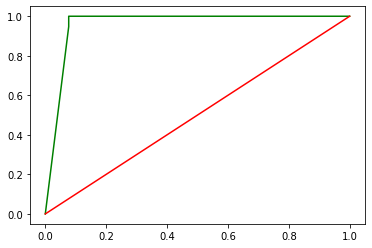

integral 0.9595141700404858


In [314]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = neigh.predict_proba(X_test)
#print("A", neigh.predict_proba(X_test))
#print("B", neigh.predict(X_test))

#print(probs)
probs = probs[:, 1]
#print(probs)
#print(len(y_test), len(probs))
auc = roc_auc_score(y_test, probs)

fpr, tpr, garbage = roc_curve(y_test, probs)
plt.plot(fpr, tpr, 'g')
plt.plot([0,1], [0,1], 'r')
plt.show()
print("integral", auc)

Нарисовать кривую точность полнота.

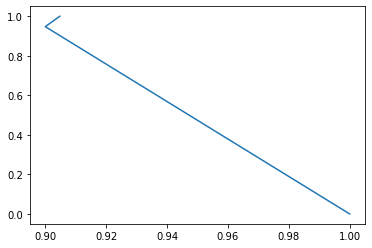

In [315]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, probs)
plt.plot(precision, recall)

На лекции была такая картинка (та, что слева), и она очень похожа с той, что выше. Но рассчитаной выше есть какой-то артефакт в начале, который мне не ясен. Прошу подсказать, что не так

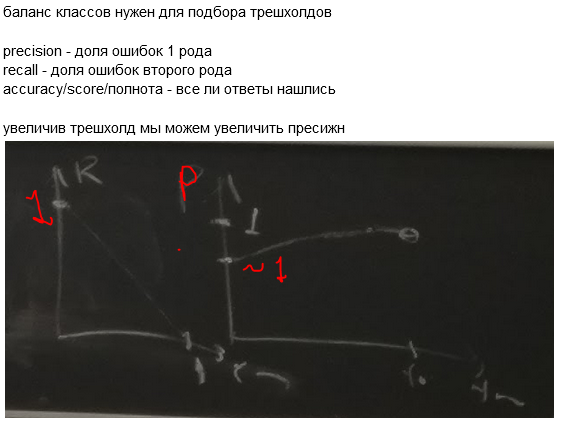